<a href="https://colab.research.google.com/github/nqvst/PyTorch/blob/main/basic_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# basic implementation from this article
https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Activation function tanh and derivative
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;


# Loss function mse Mean Squared Error
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true)/y_true.size


In [ ]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input):
        raise NotImplementedError

    def backward_propagation(self, output_error, learning_rate):
        NotImplementedError


In [ ]:
class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def forward_propagation(self, input):
        self.input = input
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [ ]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input):
        self.input = input
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [ ]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):
        self.layers.append(layer)

    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        n_samples = len(input_data)
        result = []

        for i in range(n_samples):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)
        return result

    def fit(self, x_train, y_train, epochs, lr):

        n_samples = len(x_train)

        for i in range(epochs):
            err = 0
            for j in range(n_samples):
                output = x_train[j]
                # feed the input data through the layers one after another.
                # replacing the initial input with the output from the previous
                # layer for each layer
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                err += self.loss(y_train[j], output) # for displaying under training

                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, lr)

            err /= n_samples
            print(f"epoch {i + 1}/{epochs} error={err}")

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def reshape(dataset_x, dataset_y):
    # reshape
    dataset_x = dataset_x.reshape(dataset_x.shape[0], 1, 28 * 28)
    dataset_x = dataset_x.astype('float32')
    dataset_x /= 255 # values between 0 and 1
    dataset_y = np_utils.to_categorical(dataset_y)
    return dataset_x, dataset_y
# reshape
x_images_test = x_test
(x_train, y_train) = reshape(x_train, y_train)
(x_test, y_test) = reshape(x_test, y_test)



In [ ]:
nn = Network()
nn.add(FCLayer(28*28, 100))
nn.add(ActivationLayer(tanh, tanh_prime))
nn.add(FCLayer(100, 50))
nn.add(ActivationLayer(tanh, tanh_prime))
nn.add(FCLayer(50, 10))
nn.add(ActivationLayer(tanh, tanh_prime))

nn.use(mse, mse_prime)
nn.fit(x_train[0:1000], y_train[0:1000], epochs=50, lr=0.01)


epoch 1/50 error=0.4934948229902646
epoch 2/50 error=0.3068133603080869
epoch 3/50 error=0.20691665383231078
epoch 4/50 error=0.14617545438996116
epoch 5/50 error=0.11200275048542709
epoch 6/50 error=0.09292209283747373
epoch 7/50 error=0.08168494791955641
epoch 8/50 error=0.07453209140008246
epoch 9/50 error=0.0696068429743142
epoch 10/50 error=0.06596804410651483
epoch 11/50 error=0.06312465262204002
epoch 12/50 error=0.06079860231615209
epoch 13/50 error=0.05880794635005631
epoch 14/50 error=0.05704436566201241
epoch 15/50 error=0.055451474303118954
epoch 16/50 error=0.05399899288709789
epoch 17/50 error=0.05265960012638815
epoch 18/50 error=0.05141237403591709
epoch 19/50 error=0.05024362397251979
epoch 20/50 error=0.04914351568727314
epoch 21/50 error=0.04810434746602821
epoch 22/50 error=0.0471193386669496
epoch 23/50 error=0.04618196760692618
epoch 24/50 error=0.04528629606472396
epoch 25/50 error=0.0444274903162465
epoch 26/50 error=0.04360188572473008
epoch 27/50 error=0.04280

In [ ]:
idx = 693
out = nn.predict(x_test[idx])
print(f"predicted: {np.argmax(out) + 1} \n actual: {np.argmax(y_test[idx]) + 1}")

predicted: 9 
 actual: 9


In [ ]:
preds = nn.predict(x_test[:100])
validation_error = mse(y_test[:100], preds)

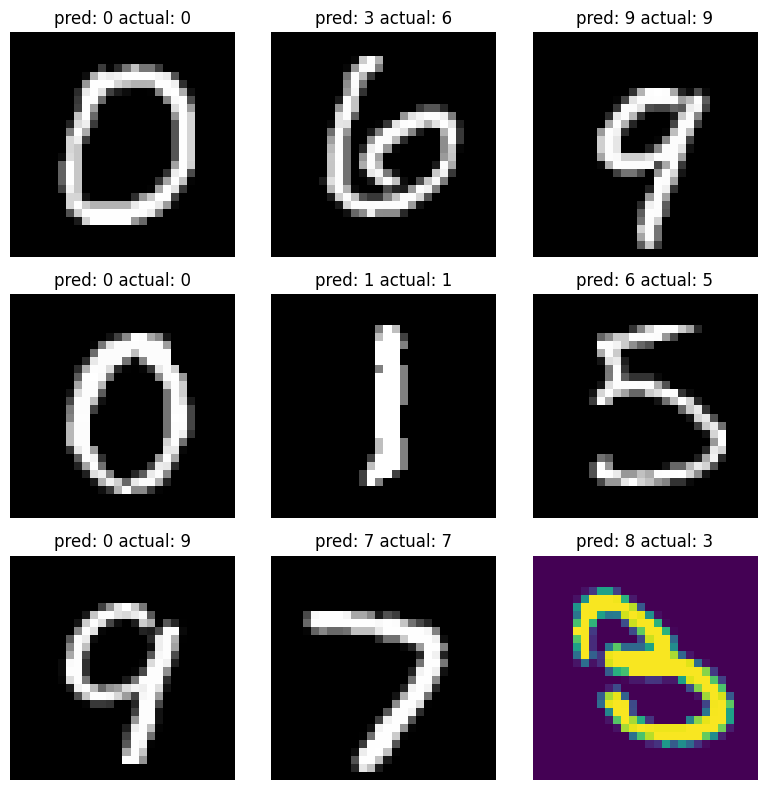

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
axs = axs.flatten()
offset = 10
for i in range(0, 9):
    offset_id = i + offset
    image = x_images_test[offset_id]
    p_label = np.argmax(preds[offset_id])
    a_label = np.argmax(y_test[offset_id])
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(f"pred: {p_label} actual: {a_label}")
    axs[i].axis('off')
    plt.imshow(image)

plt.tight_layout()
plt.show()